# Mall Customer Segmentation

        By
                 
                 Dhruv Patel (191310132089)

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mall_customer=pd.read_csv("Mall_Customers.csv")
mall_customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
mall_customer.shape

(200, 5)

In [28]:
# getting some informations about the dataset
mall_customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [29]:
# checking for the null values
mall_customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [30]:
#dropping "CustomerID" column because it is not useful
mall_customer.drop(["CustomerID"],axis=1,inplace=True)

In [31]:
mall_customer.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Now Plotting the graphs of 4 different attributes Gender , Age , Annual Income , Spending Score to get more information about data

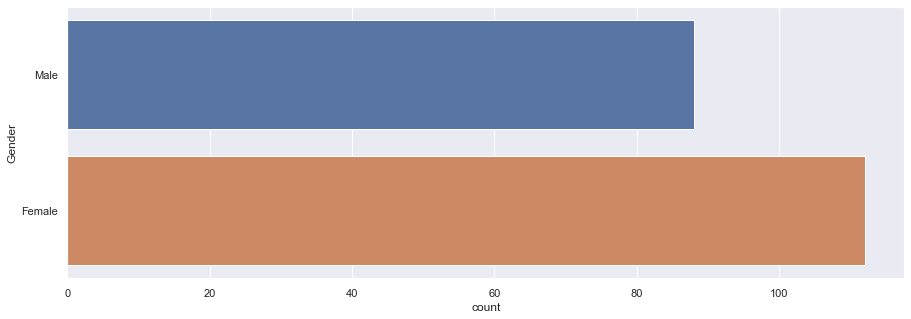

In [32]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=mall_customer)
plt.show()

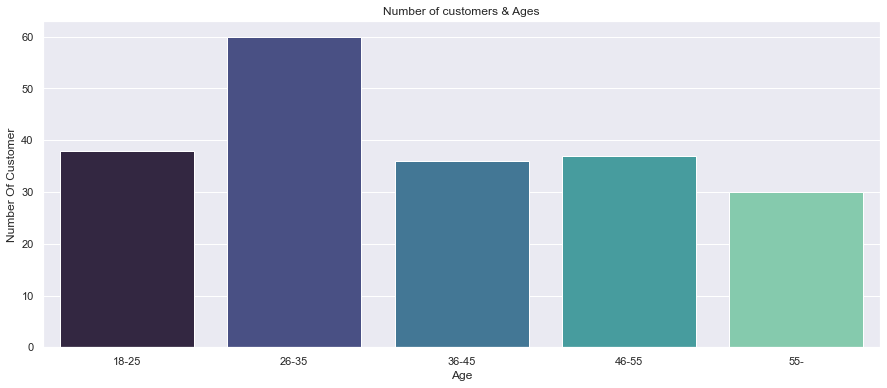

In [33]:
age_18_to_25=mall_customer.Age[(mall_customer.Age>=18) & (mall_customer.Age <=25)]
age_26_to_35=mall_customer.Age[(mall_customer.Age>=26) & (mall_customer.Age <=35)]
age_36_to_45=mall_customer.Age[(mall_customer.Age>=36) & (mall_customer.Age <=45)]
age_46_to_55=mall_customer.Age[(mall_customer.Age>=46) & (mall_customer.Age <=55)]
age_55_onwards=mall_customer.Age[mall_customer.Age>=55]

x_age=["18-25","26-35","36-45","46-55","55-"]
y_age=[len(age_18_to_25.values),len(age_26_to_35.values),len(age_36_to_45.values),len(age_46_to_55.values),len(age_55_onwards.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x_age,y=y_age,palette="mako")
plt.title("Number of customers & Ages")
plt.xlabel("Age")
plt.ylabel("Number Of Customer")
plt.show()

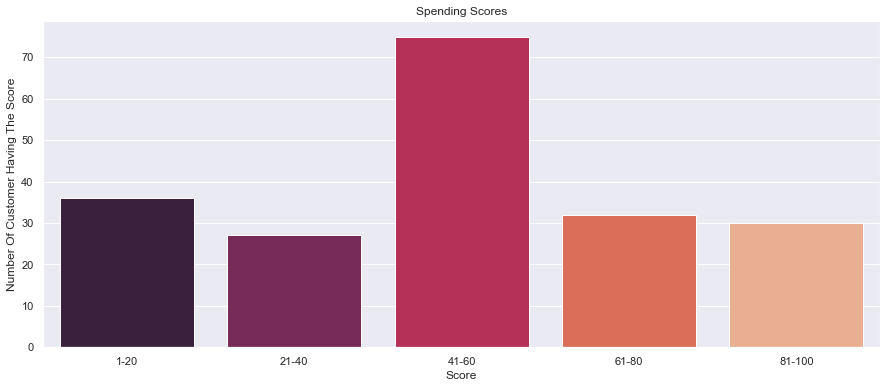

In [34]:
ss_1_20=mall_customer["Spending Score (1-100)"][(mall_customer["Spending Score (1-100)"]>=1)&(mall_customer["Spending Score (1-100)"]<=20)]
ss_21_40=mall_customer["Spending Score (1-100)"][(mall_customer["Spending Score (1-100)"]>=21)&(mall_customer["Spending Score (1-100)"]<=40)]
ss_41_60=mall_customer["Spending Score (1-100)"][(mall_customer["Spending Score (1-100)"]>=41)&(mall_customer["Spending Score (1-100)"]<=60)]
ss_61_80=mall_customer["Spending Score (1-100)"][(mall_customer["Spending Score (1-100)"]>=61)&(mall_customer["Spending Score (1-100)"]<=80)]
ss_81_100=mall_customer["Spending Score (1-100)"][(mall_customer["Spending Score (1-100)"]>=81)&(mall_customer["Spending Score (1-100)"]<=100)]

x_ss=["1-20","21-40","41-60","61-80","81-100"]
y_ss=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x_ss,y=y_ss,palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number Of Customer Having The Score")
plt.show()

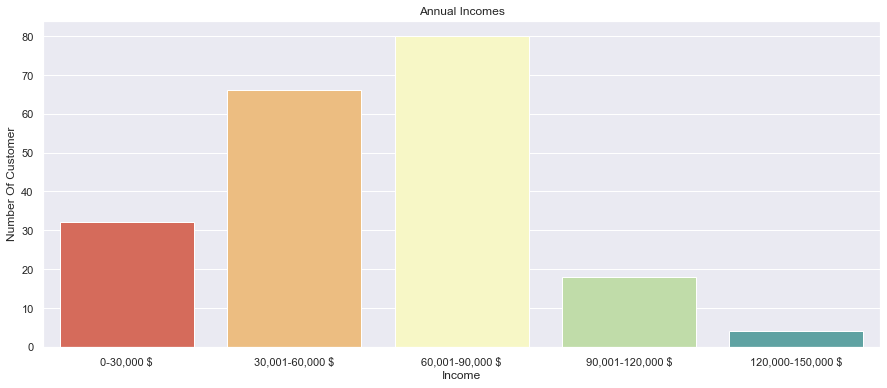

In [35]:
ai_0_30=mall_customer["Annual Income (k$)"][(mall_customer["Annual Income (k$)"]>=0)&(mall_customer["Annual Income (k$)"]<=30)]
ai_31_60=mall_customer["Annual Income (k$)"][(mall_customer["Annual Income (k$)"]>=31)&(mall_customer["Annual Income (k$)"]<=60)]
ai_61_90=mall_customer["Annual Income (k$)"][(mall_customer["Annual Income (k$)"]>=61)&(mall_customer["Annual Income (k$)"]<=90)]
ai_91_120=mall_customer["Annual Income (k$)"][(mall_customer["Annual Income (k$)"]>=91)&(mall_customer["Annual Income (k$)"]<=120)]
ai_121_150=mall_customer["Annual Income (k$)"][(mall_customer["Annual Income (k$)"]>=121)&(mall_customer["Annual Income (k$)"]<=150)]


x_ai=["0-30,000 $","30,001-60,000 $","60,001-90,000 $","90,001-120,000 $","120,000-150,000 $"]
y_ai=[len(ai_0_30.values),len(ai_31_60.values),len(ai_61_90.values),len(ai_91_120.values),len(ai_121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x_ai,y=y_ai,palette="Spectral")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number Of Customer")
plt.show()

### Now, We are going to implement KMeans clustering algorithm on this mall_customer dataset

### here we made clusters based on 2 attributes Annual Income & Spending Score

In [36]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [
            euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
        ]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

In [37]:
#Choosing the Annual Income  & Spending Score attribute for clustering
X = mall_customer[	["Annual Income (k$)"	,"Spending Score (1-100)"]].values

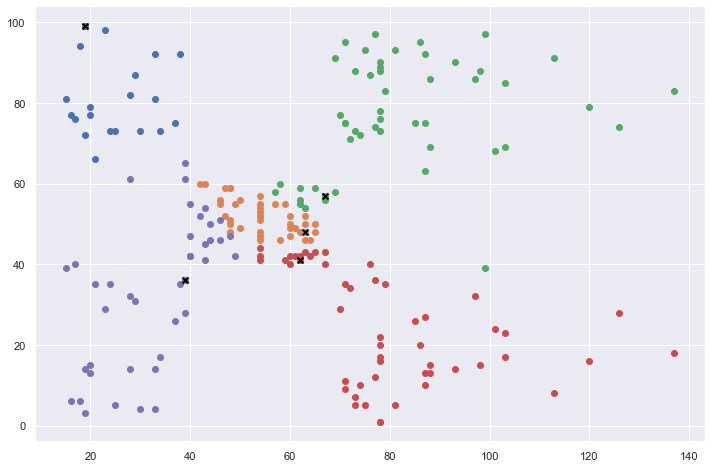

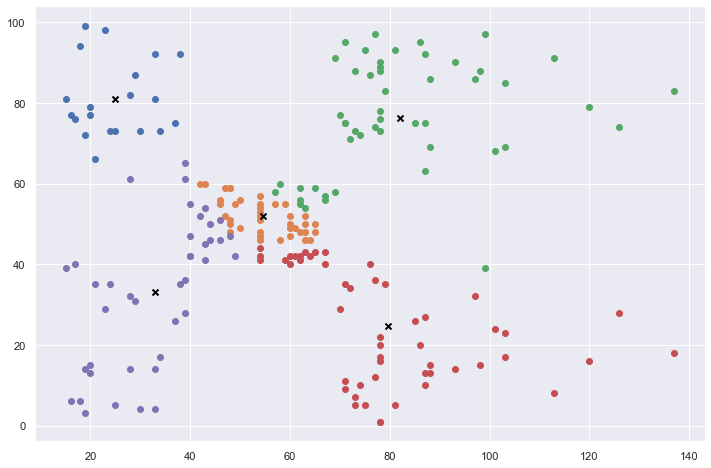

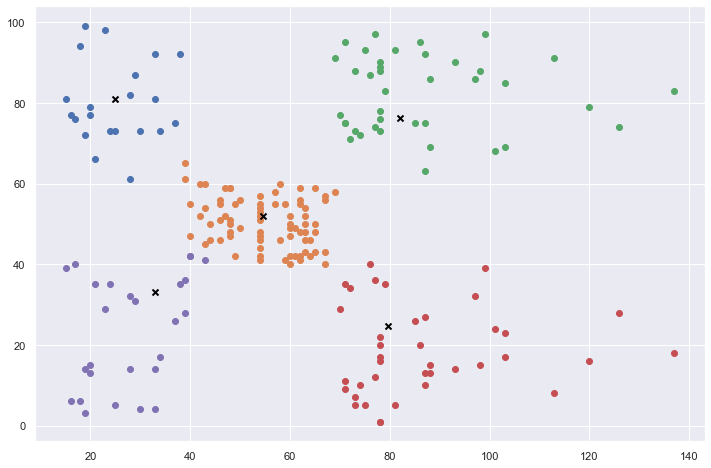

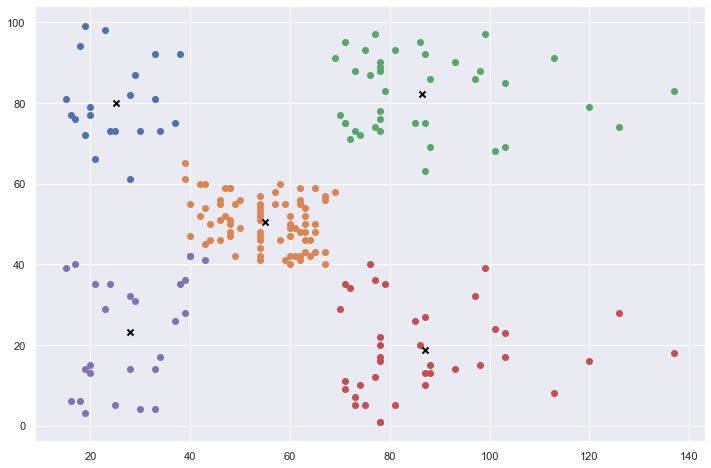

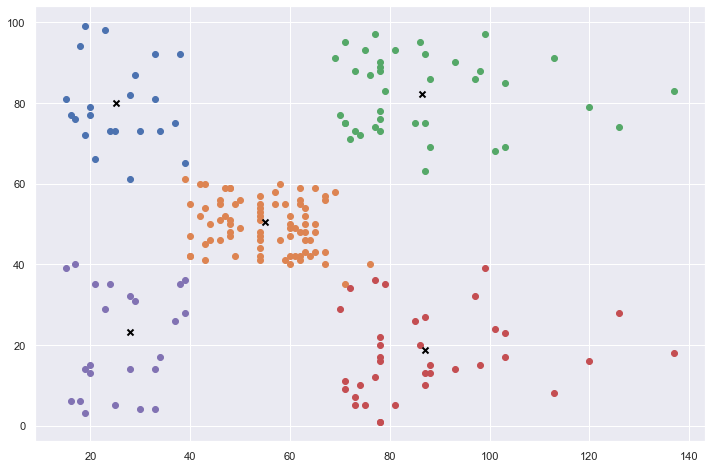

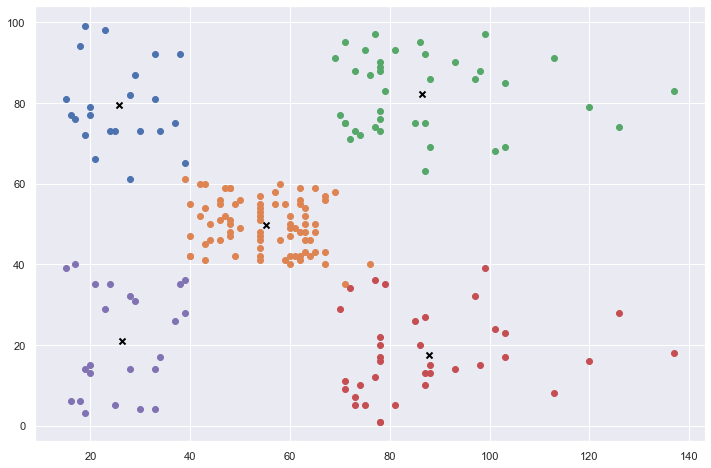

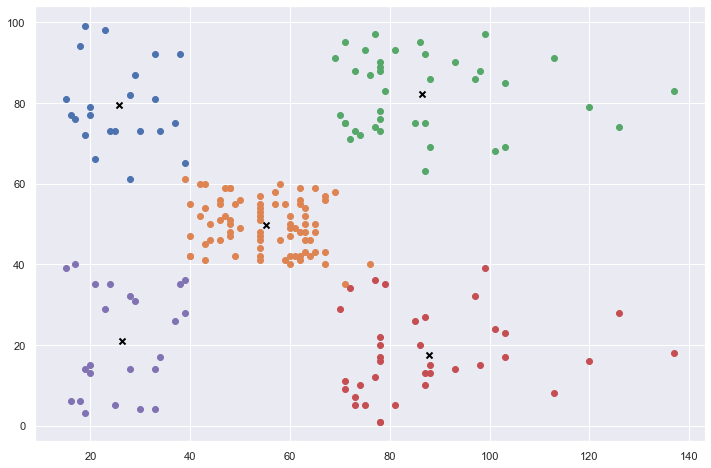

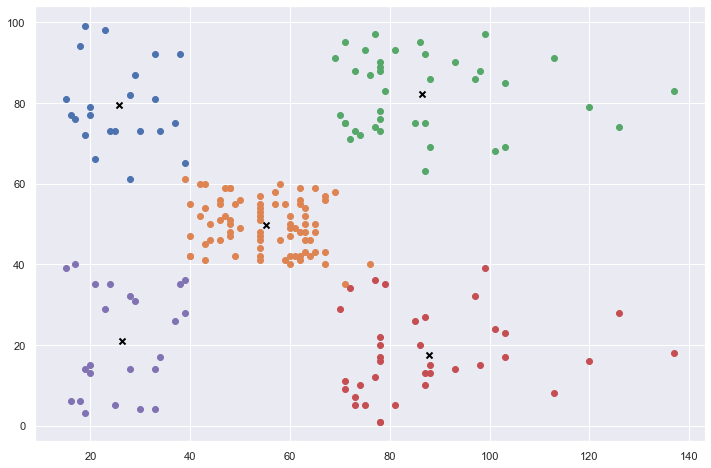

In [38]:
k_means = KMeans(K=5, max_iters=100, plot_steps=True)
k_means.predict(X)
k_means.plot()

### Now, We are going to implement KMeans clustering algorithm on this mall_customer dataset

### here we made clusters based on 2 attributes Annual Income & Spending Score

In [46]:
#Choosing the Annual Income  & Spending Score attribute for clustering
X = mall_customer[	["Annual Income (k$)"	,"Spending Score (1-100)"]].values

# finding wcss value for different number of clusters

from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

### Here, we can choose Optimum Number of Clusters by finding out the elbow point from the graph (here, 5 is a elbow point)

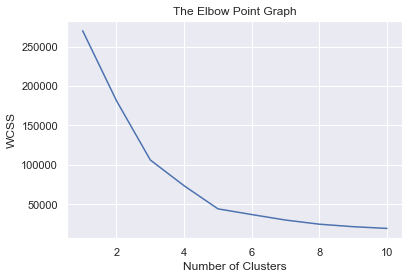

In [47]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Now here we can see from the graph that , after 5 number of clusters graph tends to become constant So we can choose 5 as a Optimum Number Of Clusters

In [48]:
#Now Training the K-means Clustering Model

k_means = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = k_means.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [49]:
import statistics as sts

print(sts.mode(Y))

1


### Here, 5 clusters are 0,1,2,3,4 &

### We get 1 as a mode of Y so it means cluster-1 has more values than other 4 clusters

### Now visualizing all the 5 clusters by plotting all the clusters & their centroids

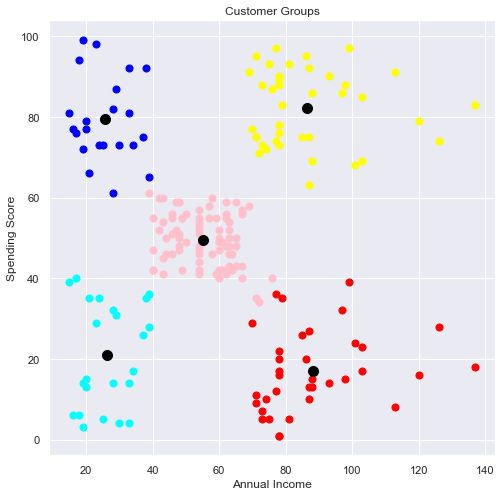

In [50]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c="red",label="Cluster 0")
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c="pink",label="Cluster 1")
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c="yellow",label="Cluster 2")
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c="blue",label="Cluster 3")
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c="cyan",label="Cluster 4")

plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

### previously we made clusters based on 2 attributes only

### Now we made clusters based on 3 attributes Age , Annual Income & Speding Score and plot them using 3D graph

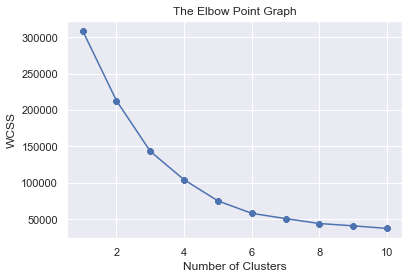

In [51]:
from mpl_toolkits.mplot3d import Axes3D

x1=mall_customer[["Age","Annual Income (k$)"	,"Spending Score (1-100)"]].values

wcss=[]
for i in range(1,11):
  k_means=KMeans(n_clusters=i,init='k-means++')
  k_means.fit(x1)
  wcss.append(k_means.inertia_)

plt.plot(range(1,11), wcss,marker="8")
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### here, elbow point is 5 so Optimum Number of Clusters are also 5

In [52]:
#Now Training the K-means Clustering Model

k_means1 = KMeans(n_clusters=5,random_state=0)

# return a label for each data point based on their cluster
Y = k_means1.fit_predict(x1)

print(Y)
print(k_means1.cluster_centers_)
print('mode:- ',sts.mode(Y))

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]
[[45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [43.08860759 55.29113924 49.56962025]
 [40.66666667 87.75       17.58333333]
 [25.52173913 26.30434783 78.56521739]]
mode:-  2


### Here, 5 clusters are 0,1,2,3,4 &

### We get 2 as a mode of Y so it means cluster-2 has more values than other 4 clusters

### Now visualizing all the 5 clusters by plotting all the clusters & their centroids in 3D graph

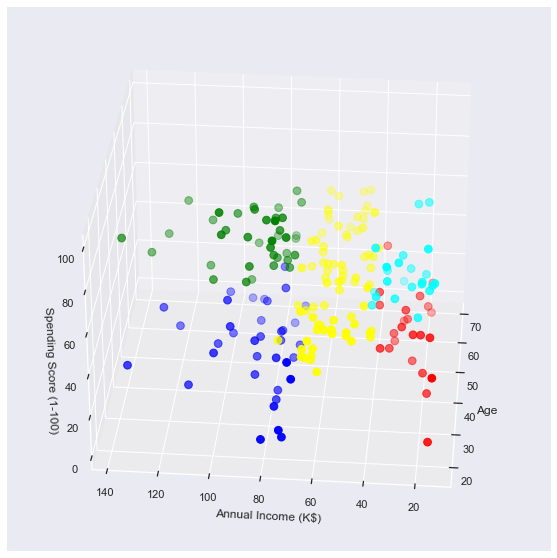

In [53]:
clusters=k_means1.fit_predict(x1)
mall_customer["label"]=clusters

df=mall_customer

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(df.Age[df.label==0],df["Annual Income (k$)"][df.label==0],df["Spending Score (1-100)"][df.label==0],c="red",s=60)
ax.scatter(df.Age[df.label==1],df["Annual Income (k$)"][df.label==1],df["Spending Score (1-100)"][df.label==1],c="green",s=60)
ax.scatter(df.Age[df.label==2],df["Annual Income (k$)"][df.label==2],df["Spending Score (1-100)"][df.label==2],c="yellow",s=60)
ax.scatter(df.Age[df.label==3],df["Annual Income (k$)"][df.label==3],df["Spending Score (1-100)"][df.label==3],c="blue",s=60)
ax.scatter(df.Age[df.label==4],df["Annual Income (k$)"][df.label==4],df["Spending Score (1-100)"][df.label==4],c="cyan",s=60)

ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Annual Income (K$)")
ax.set_zlabel("Spending Score (1-100)")

plt.show()